<a href="https://colab.research.google.com/github/aakankshajadhav/TSF-Task-1-Prediction-using-supervised-ML-/blob/main/TASK_1_GRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THE SPARKS FOUNDATION**

**TASK 1: Prediction Using Supervised ML**

**Name: Aakanksha Jadhav**

**Perform exploratory Data Analysis on dataset 'Student' To Predict the percentage of marks of the students based on the number of hours they studied.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(url)

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
data.shape

(25, 2)

In [10]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [32]:
data.isnull == True

False

**DATA VISUALIZATION**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


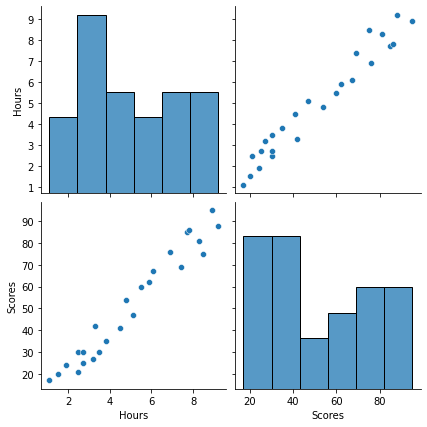

In [18]:
sns.pairplot(data,size=3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


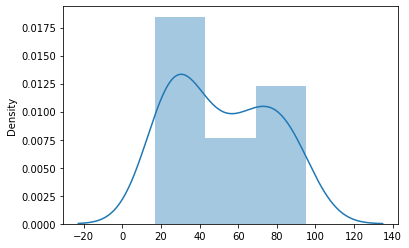

In [23]:
sns.distplot([data["Scores"]])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


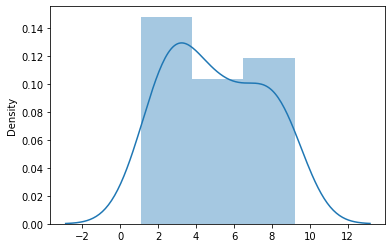

In [24]:
sns.distplot([data["Hours"]])

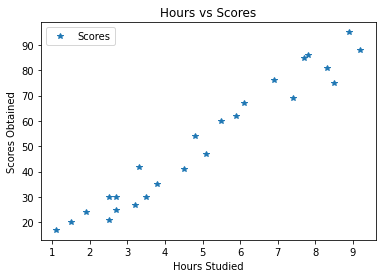

In [11]:
data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Scores Obtained')  
plt.show()

In [12]:
#preprocessing the data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [13]:
#splitting the dataset into training and testing.We'll do this by using Scikit-Learn's built-in train_test_split() method: 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=42)

In [16]:
#We have split our data into training and testing sets, and now is finally the time to train our algorithm
#For this task, we are using simple Linear Regression model from scikit-learn library
from sklearn.linear_model import LinearRegression  
reg= LinearRegression()  
reg.fit(X_train, y_train) 
print("Model trained.")

Model trained.


In [15]:
#let check the model performance on test data
y_pred = reg.predict(X_test) 
#Comparing Actual vs Predicted
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df2

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


**VISUALISING THE REGRESSION LINE ON THE DATA**

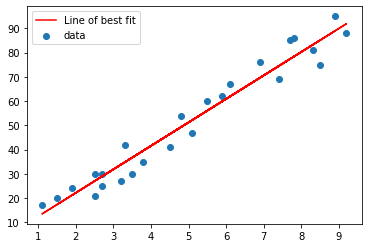

In [25]:
#Plotting the regression line 
line = reg.coef_*X+reg.intercept_
plt.scatter(X,y,label='data')
plt.plot(X, line,label='Line of best fit',color='r')
plt.legend()

In [26]:
#Accuracy of model on test data
print('Accuracy:',reg.score(X_test,y_test))
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Accuracy: 0.9678055545167994
Mean Absolute Error: 3.9207511902099244


 **Comparing Actual vs Predicted**

In [27]:
# Comparing Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
data

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


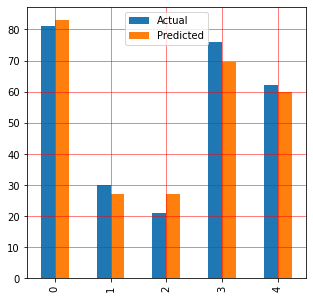

In [29]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

data.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [30]:
#Giving real time user input
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


**EVALUATION OF THE MODEL**

In [31]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
R-2: 0.9678055545167994


**FROM THE ABOVE RESULT WE CAN SAY THAT IF A STUDENT STUDIED FOR 9.25 HOURS/DAY THEN THE STUDENT GOT 92.38% MARKS.**